# **Q3**

In [65]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [14]:
# Import datasets as .csv
!pip install --upgrade --no-cach-dir gdown
! gdown 1QxGAZm4rvY9U_n5gUIaAgujJWcygMzN9


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From: https://drive.google.com/uc?id=1QxGAZm4rvY9U_n5gUIaAgujJWcygMzN9
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 95.6MB/s]


In [15]:
dataset = pd.read_csv('/content/weatherHistory.csv')
pd.DataFrame(dataset).head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Part I

A) Plot histogram of features

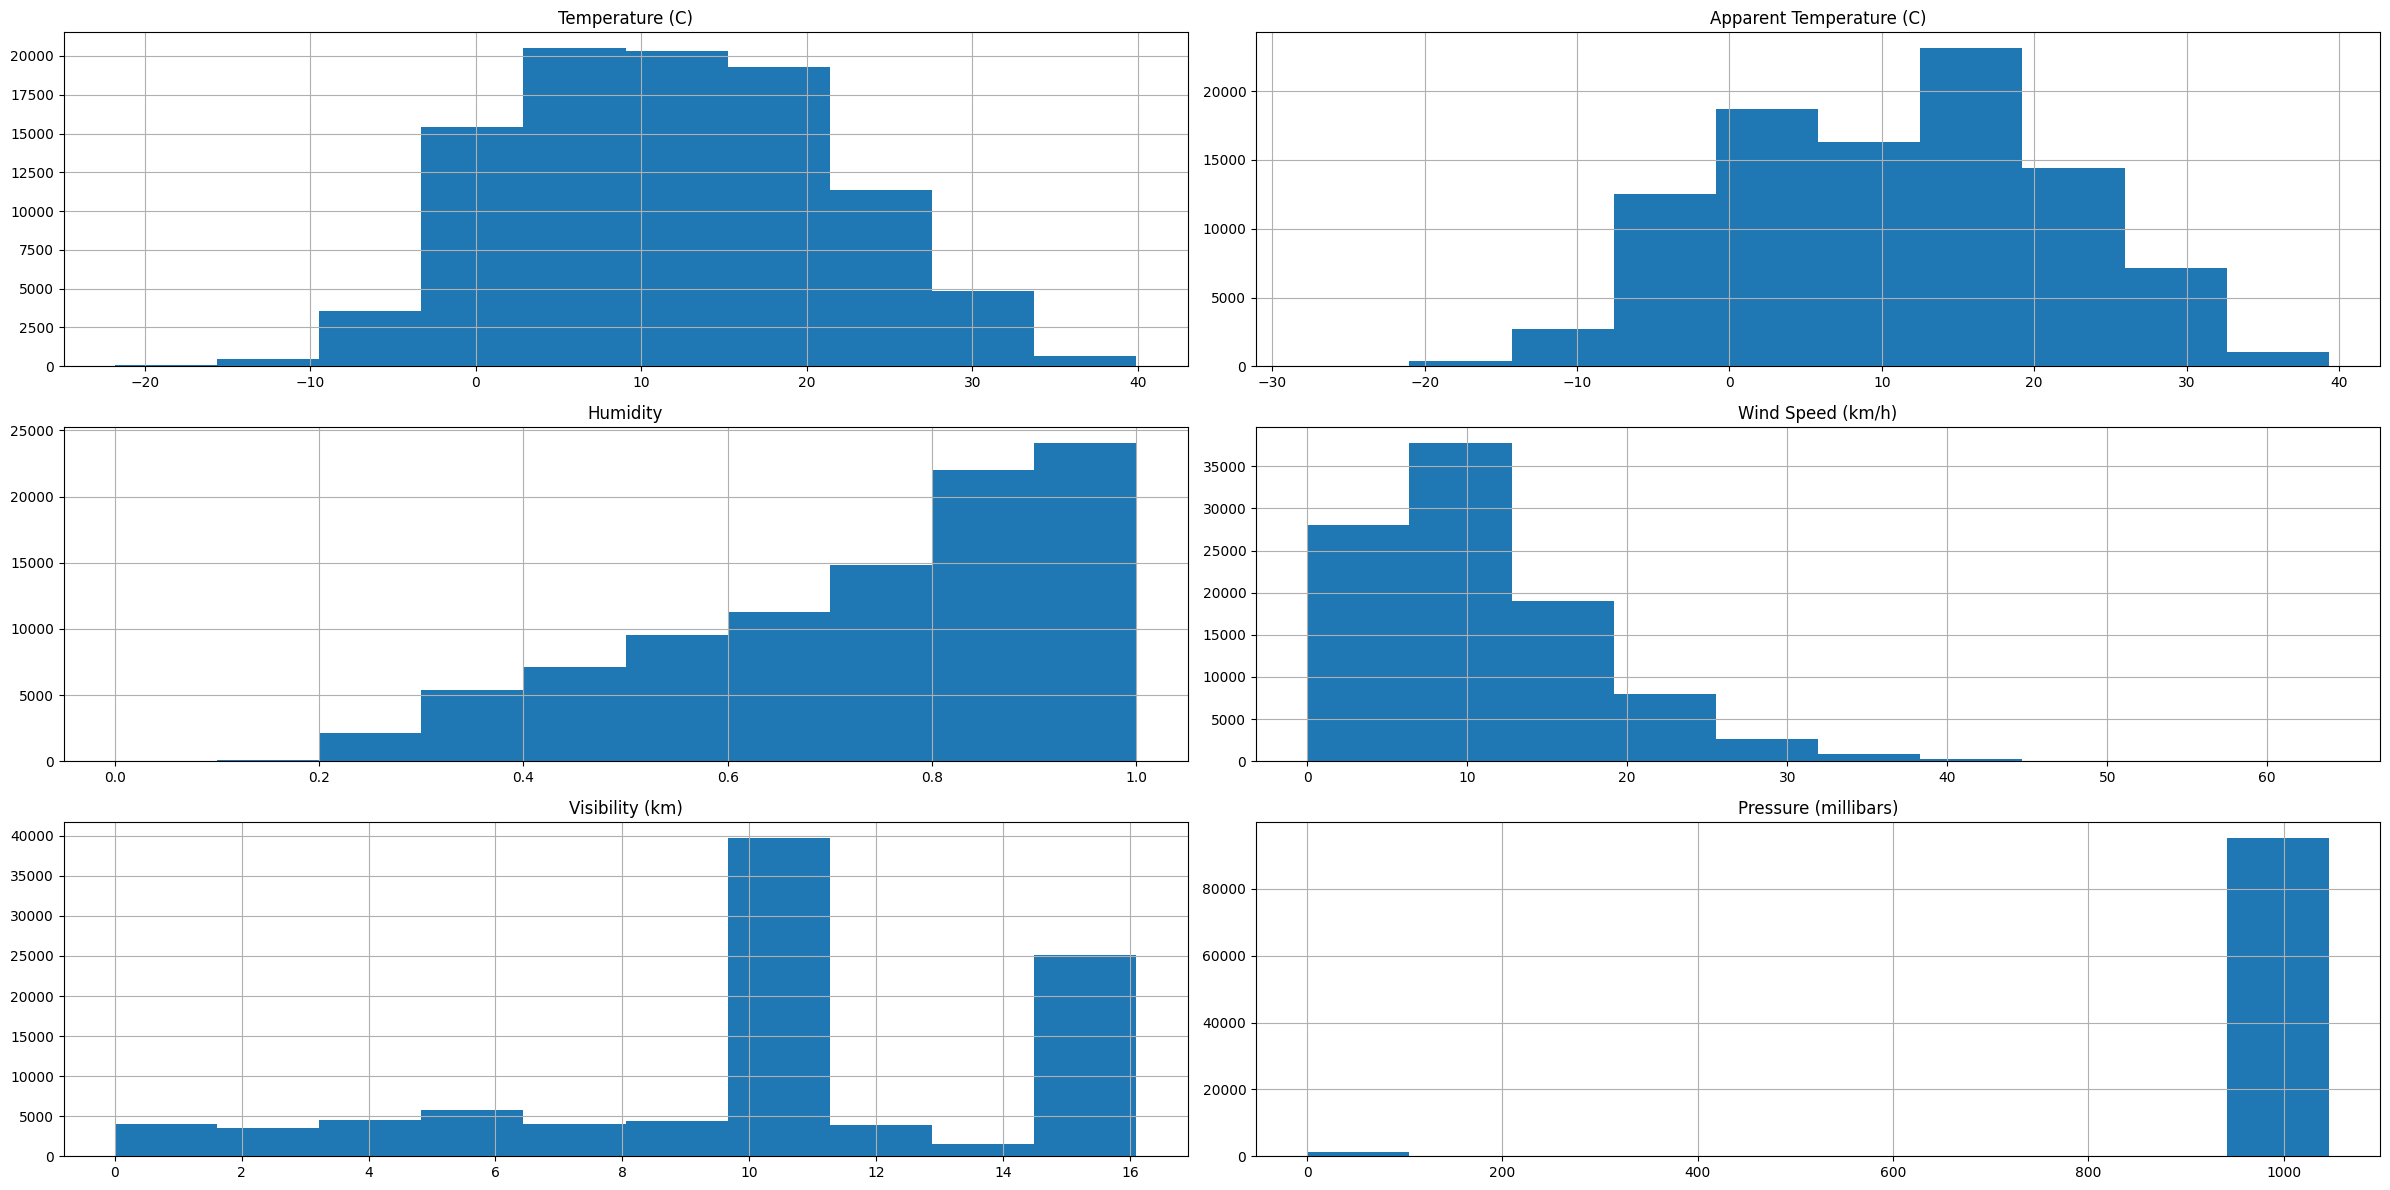

In [16]:
plt.rcParams["figure.figsize"] = (24, 12)
numerical_features = dataset[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']]
numerical_features.hist()
plt.tight_layout()
plt.show()

B) Correlation Heatmap of features

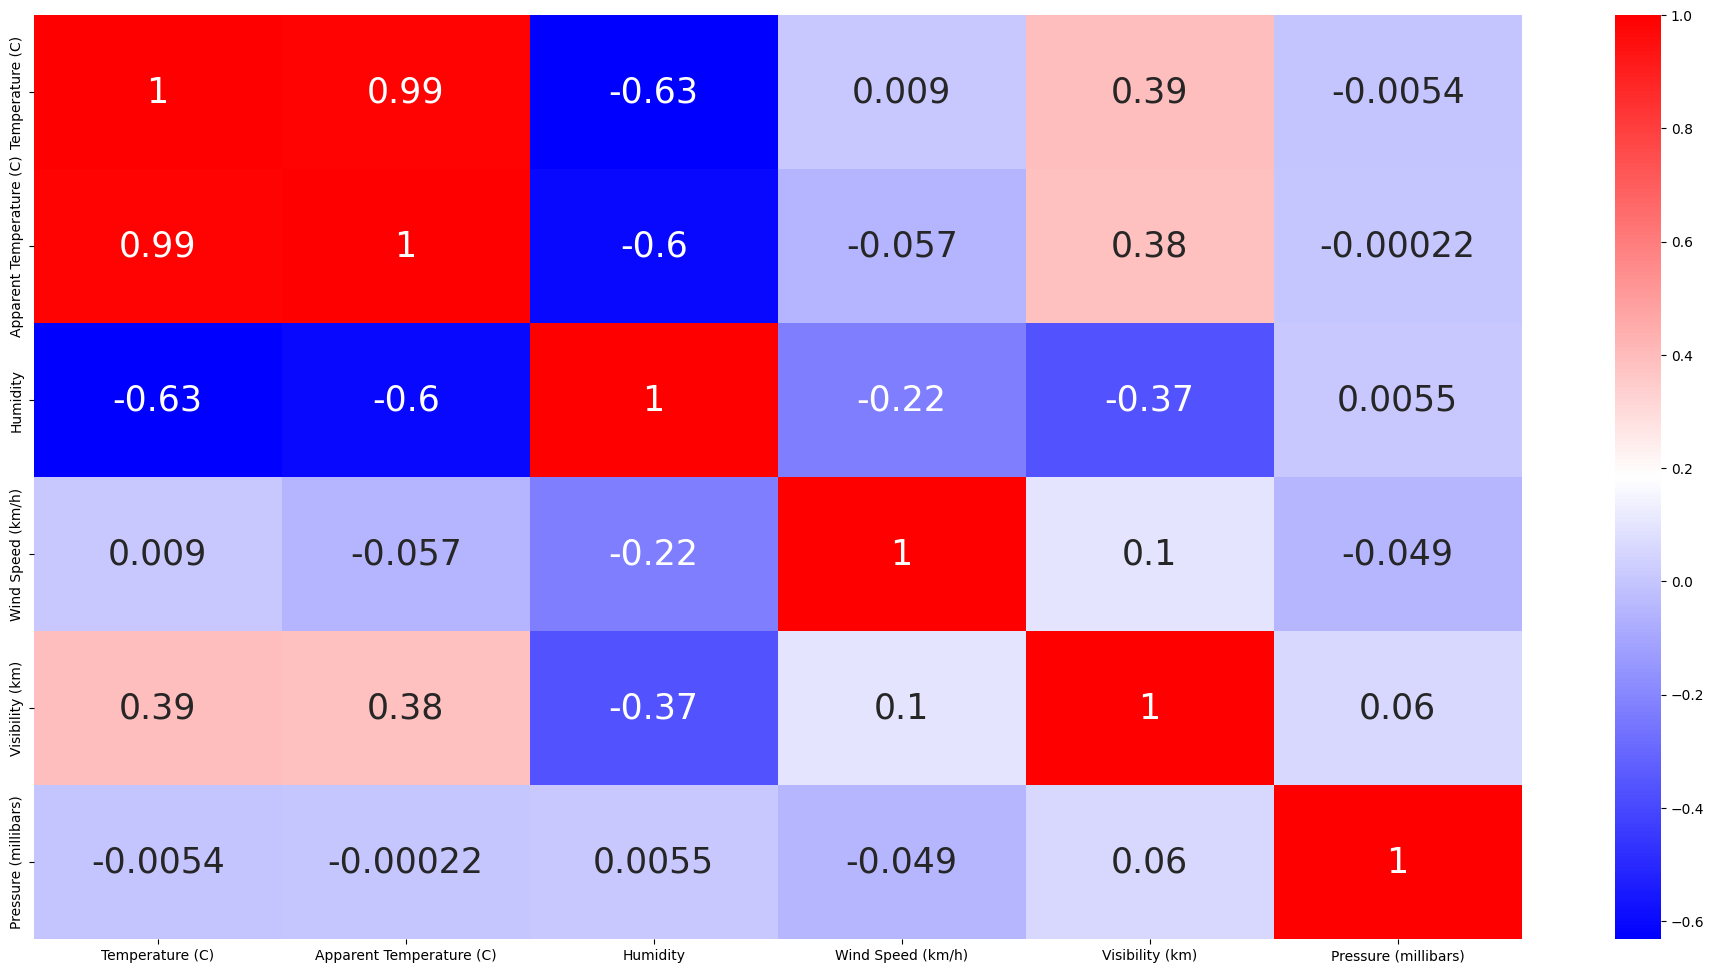

In [17]:
sb.heatmap(numerical_features.corr(), cmap = 'bwr', annot=True, annot_kws={"size": 25});

# Part II

A) Preprocessing data

In [6]:
X = dataset['Humidity']
y = dataset[['Temperature (C)','Apparent Temperature (C)' ]]

In [7]:
print(X.info())

<class 'pandas.core.series.Series'>
RangeIndex: 96453 entries, 0 to 96452
Series name: Humidity
Non-Null Count  Dtype  
--------------  -----  
96453 non-null  float64
dtypes: float64(1)
memory usage: 753.7 KB
None


In [8]:
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB
None


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 24, test_size = 0.2, shuffle = False)

x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

B) LS method

In [50]:
# Define model
class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self.coefficients

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)

In [52]:
# Predict Temperature with LS method
LS1 = LinearRegressionLS()
LS_temp= LS1.fit(x_train, y_train['Temperature (C)'])

ypred_LS_temp = LS1.predict(x_train)

yhat_LS_temp = LS1.predict(x_test)

# Calculate Mean Squared Error for test data
MSE_LS_temp = np.mean((y_test['Temperature (C)'] - yhat_LS_temp)**2)
print("Mean Squared Error of Predict Temperature by LS method", MSE_LS_temp)

Mean Squared Error of Predict Temperature by LS method 50.38340187766987


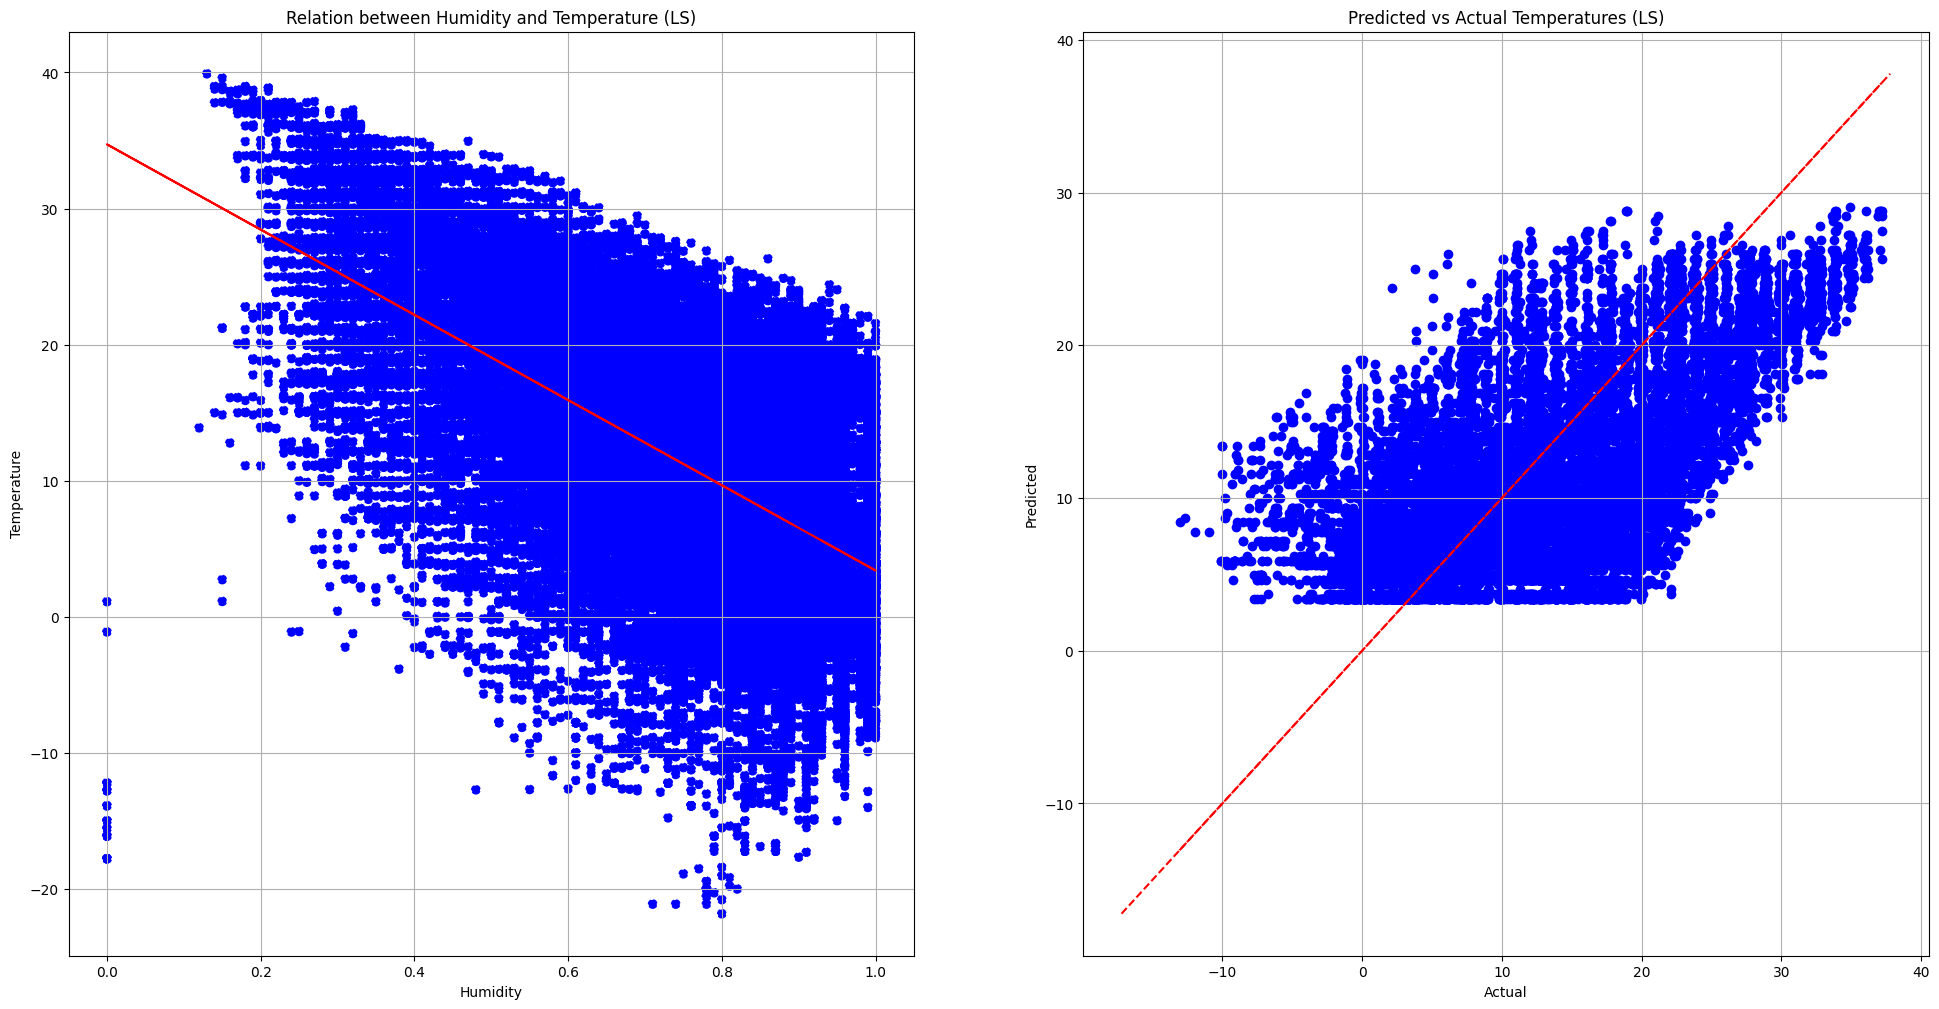

In [57]:
# Plot

fig1, (ax11, ax12) = plt.subplots(1, 2)

ax11.scatter(X, y['Temperature (C)'], color='blue', linestyle='--')
ax11.plot(x_train, ypred_LS_temp, color='red')
ax11.set_title('Relation between Humidity and Temperature (LS)')
ax11.set_xlabel('Humidity')
ax11.set_ylabel('Temperature')
ax11.grid(True)

ax12.scatter(y_test['Temperature (C)'], yhat_LS_temp, color='blue')
ax12.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
ax12.set_title('Predicted vs Actual Temperatures (LS)')
ax12.set_xlabel('Actual')
ax12.set_ylabel('Predicted')
ax12.grid(True)

In [54]:
# Predict Apparent Temperature with LS method
LS2 = LinearRegressionLS()

LS_apptemp= LS2.fit(x_train, y_train['Apparent Temperature (C)'])

ypred_LS_apptemp = LS2.predict(x_train)

yhat_LS_apptemp = LS2.predict(x_test)

# Calculate Mean Squared Error for test data
MSE_LS_apptemp = np.mean((y_test['Apparent Temperature (C)'] - yhat_LS_apptemp)**2)
print("Mean Squared Error of Predict Apparent Temperature by LS method", MSE_LS_apptemp)

Mean Squared Error of Predict Apparent Temperature by LS method 66.80220072985139


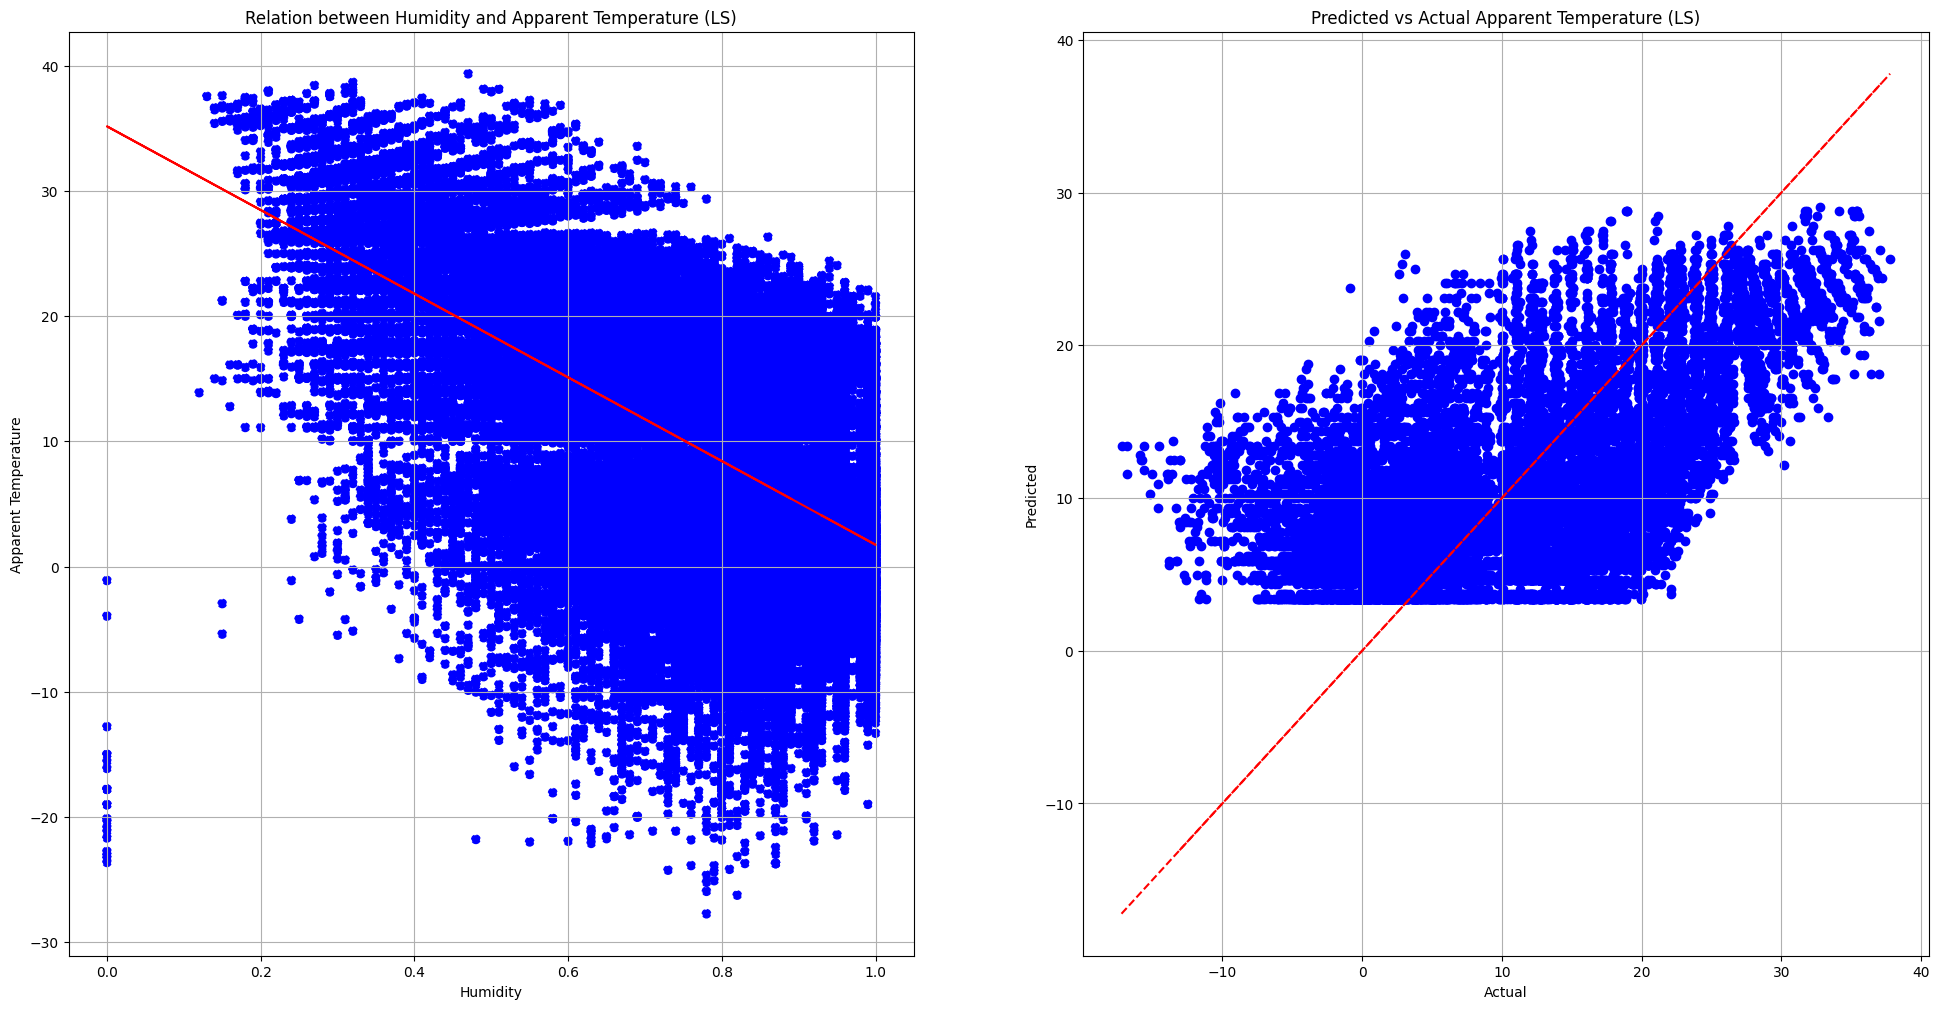

In [56]:
# Plot

fig2, (ax21, ax22) = plt.subplots(1, 2)

ax21.scatter(X, y['Apparent Temperature (C)'], color='blue', linestyle='--')
ax21.plot(x_train, ypred_LS_apptemp, color='red')
ax21.set_title('Relation between Humidity and Apparent Temperature (LS)')
ax21.set_xlabel('Humidity')
ax21.set_ylabel('Apparent Temperature')
ax21.grid(True)

ax22.scatter(y_test['Apparent Temperature (C)'], yhat_LS_temp, color='blue')
ax22.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
ax22.set_title('Predicted vs Actual Apparent Temperature (LS)')
ax22.set_xlabel('Actual')
ax22.set_ylabel('Predicted')
ax22.grid(True)

C) RLS method

In [42]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

In [59]:
# Predict Temperature with RLS method
RLS1 = RecursiveLeastSquares(n_features=1, forgetting_factor = 0.99)
RLS_temp_error = RLS1.fit(x_train, y_train['Temperature (C)'])

ypred_RLS_temp = RLS1.predict(x_train)

yhat_RLS_temp = RLS1.predict(x_test)

MSE_RLS_temp = np.mean(np.array(RLS_temp_error)**2)
print("Mean Squared Error of Predict Temperature by RLS method", MSE_RLS_temp)

Mean Squared Error of Predict Temperature by RLS method 76.24381309144468


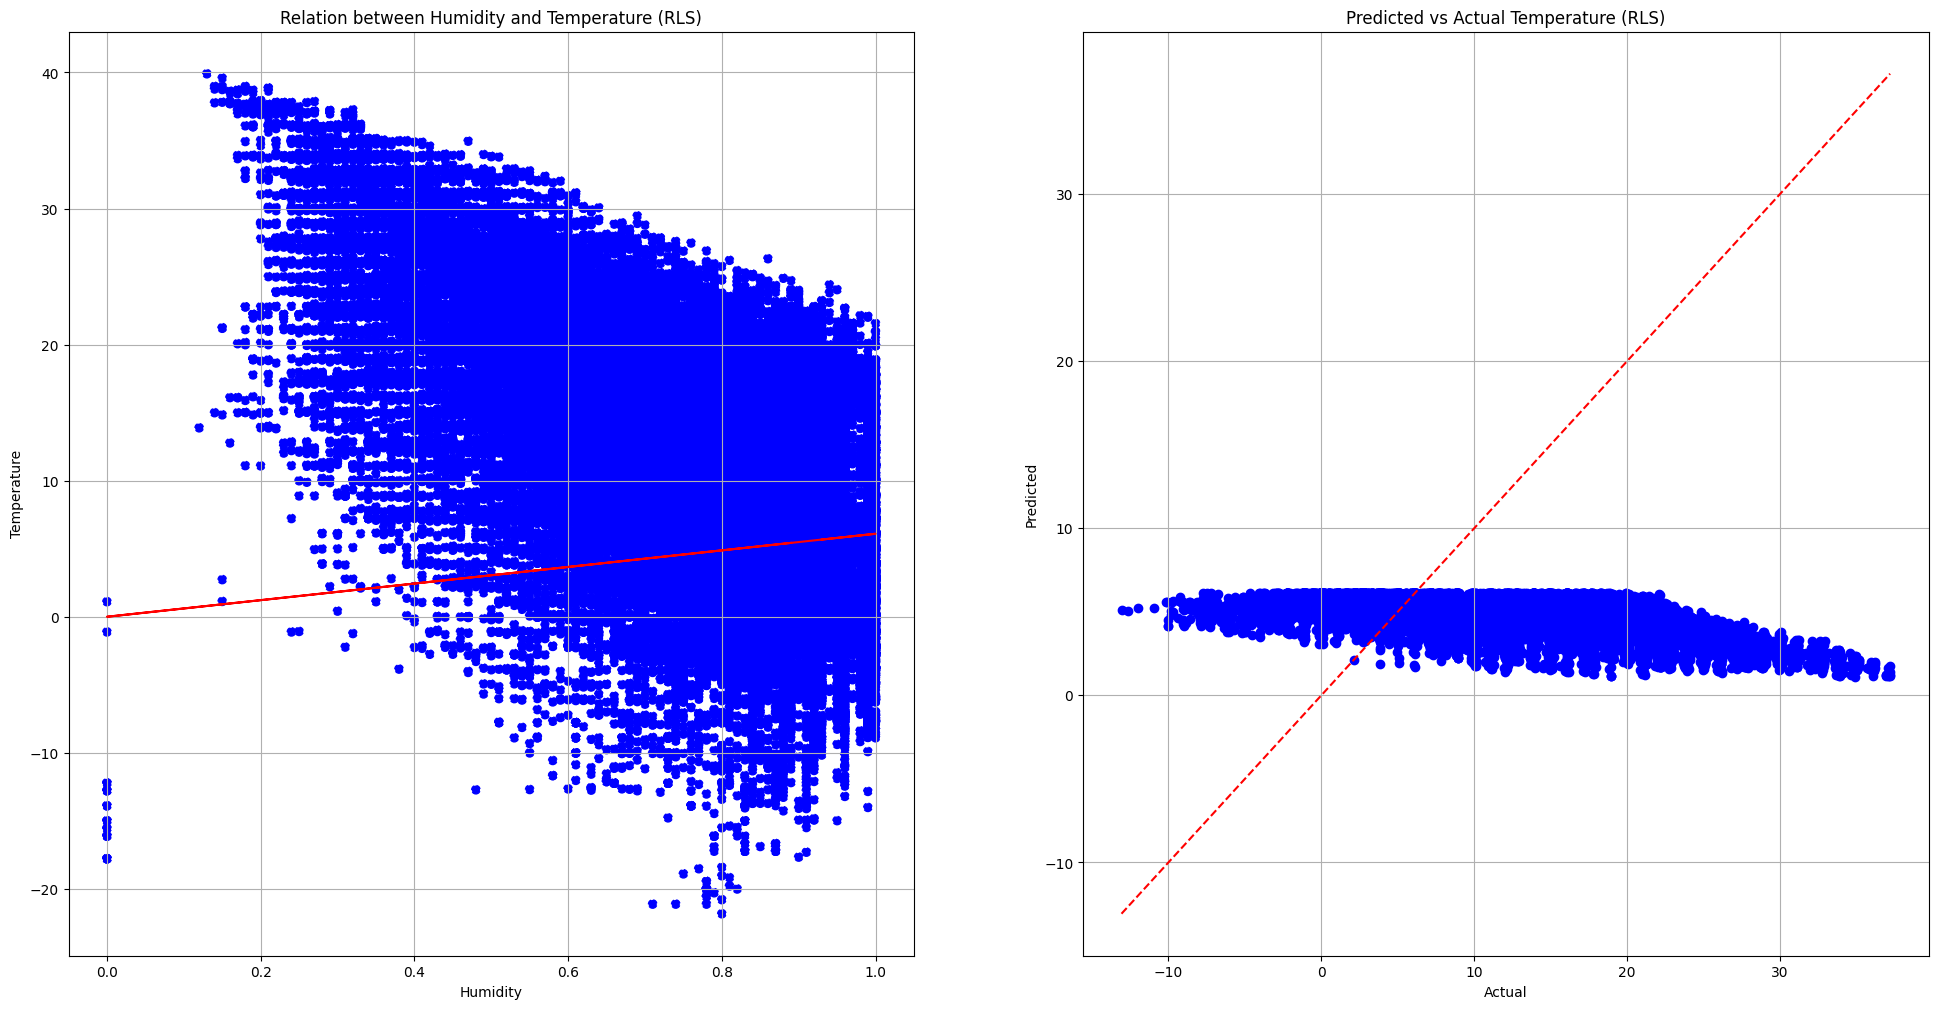

In [61]:
# Plot

fig3, (ax31, ax32) = plt.subplots(1, 2)

ax31.scatter(X, y['Temperature (C)'], color='blue', linestyle='--')
ax31.plot(x_train, ypred_RLS_temp, color='red')
ax31.set_title('Relation between Humidity and Temperature (RLS)')
ax31.set_xlabel('Humidity')
ax31.set_ylabel('Temperature')
ax31.grid(True)

ax32.scatter(y_test['Temperature (C)'], yhat_RLS_temp, color='blue')
ax32.plot([y_test['Temperature (C)'].min(), y_test['Temperature (C)'].max()], [y_test['Temperature (C)'].min(), y_test['Temperature (C)'].max()], color='red', linestyle='--')
ax32.set_title('Predicted vs Actual Temperature (RLS)')
ax32.set_xlabel('Actual')
ax32.set_ylabel('Predicted')
ax32.grid(True)

In [64]:
# Predict Apparent Temperature with RLS method
RLS2 = RecursiveLeastSquares(n_features=1, forgetting_factor = 0.99)
RLS_apptemp_error = RLS2.fit(x_train, y_train['Apparent Temperature (C)'])

ypred_RLS_apptemp = RLS2.predict(x_train)

yhat_RLS_apptemp = RLS2.predict(x_test)

MSE_RLS_apptemp = np.mean(np.array(RLS_apptemp_error)**2)
print("Mean Squared Error of Predict Apparent Temperature by RLS method", MSE_RLS_apptemp)

Mean Squared Error of Predict Apparent Temperature by RLS method 81.71390694394019


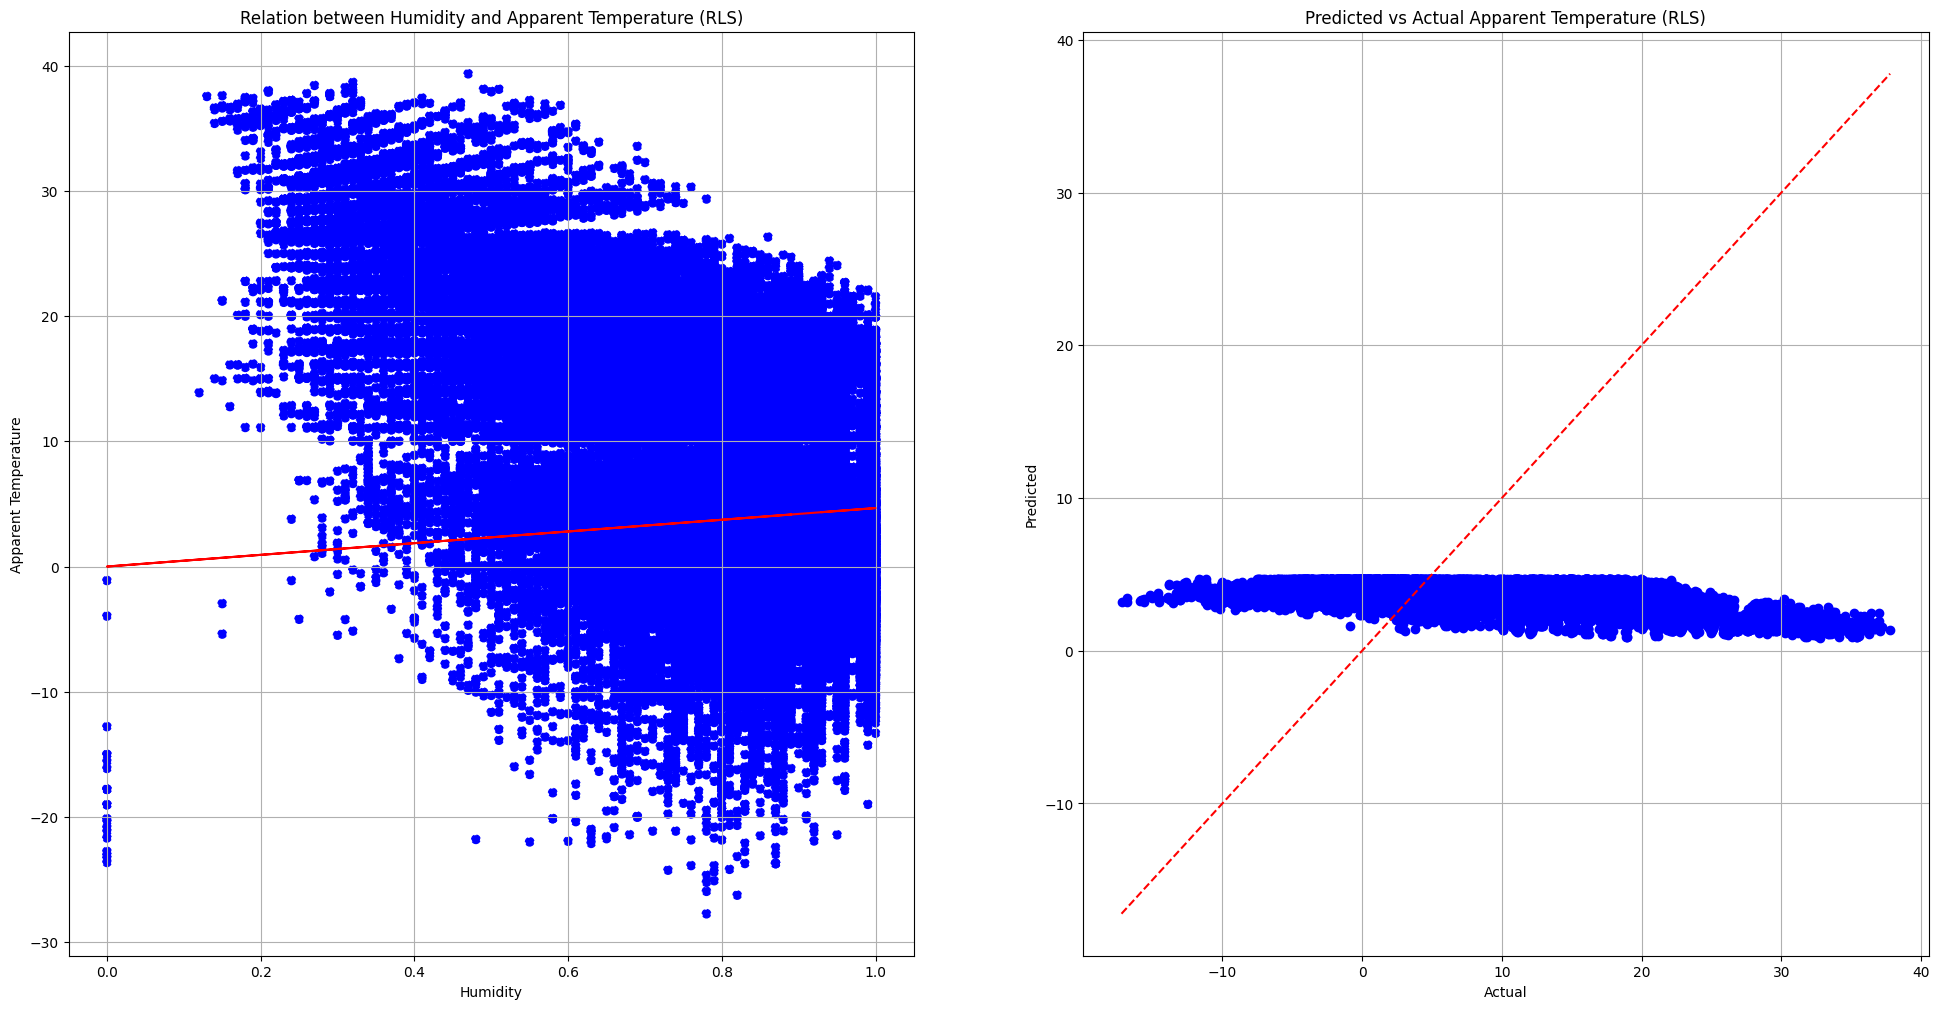

In [63]:
# Plot

fig4, (ax41, ax42) = plt.subplots(1, 2)

ax41.scatter(X, y['Apparent Temperature (C)'], color='blue', linestyle='--')
ax41.plot(x_train, ypred_RLS_apptemp, color='red')
ax41.set_title('Relation between Humidity and Apparent Temperature (RLS)')
ax41.set_xlabel('Humidity')
ax41.set_ylabel('Apparent Temperature')
ax41.grid(True)

ax42.scatter(y_test['Apparent Temperature (C)'], yhat_RLS_apptemp, color='blue')
ax42.plot([y_test['Apparent Temperature (C)'].min(), y_test['Apparent Temperature (C)'].max()], [y_test['Apparent Temperature (C)'].min(), y_test['Apparent Temperature (C)'].max()], color='red', linestyle='--')
ax42.set_title('Predicted vs Actual Apparent Temperature (RLS)')
ax42.set_xlabel('Actual')
ax42.set_ylabel('Predicted')
ax42.grid(True)

# Part II

In [67]:
error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
x_with_intercept = sm.add_constant(x_train)  # Add intercept term
WLS1 = sm.WLS(y_train['Temperature (C)'], x_with_intercept, weights=weights)
WLS_temp = WLS1.fit()

# Print the model summary
print(WLS_temp.summary())

                            WLS Regression Results                            
Dep. Variable:        Temperature (C)   R-squared:                       0.404
Model:                            WLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 5.228e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:20:51   Log-Likelihood:            -2.6474e+05
No. Observations:               77162   AIC:                         5.295e+05
Df Residuals:                   77160   BIC:                         5.295e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7149      0.104    335.066      0.0

In [68]:
WLS2 = sm.WLS(y_train['Apparent Temperature (C)'], x_with_intercept, weights=weights)
WLS_apptemp = WLS2.fit()

# Print the model summary
print(WLS_apptemp.summary())

                               WLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.367
Model:                                  WLS   Adj. R-squared:                  0.367
Method:                       Least Squares   F-statistic:                 4.467e+04
Date:                      Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:24:40   Log-Likelihood:            -2.7580e+05
No. Observations:                     77162   AIC:                         5.516e+05
Df Residuals:                         77160   BIC:                         5.516e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------